## Preprocesing of Application type classification is going to be the same as Binary model, but however there are some changes.

As the Dataset is different and it needs alittle bit more preprocessing. but the process at all are the same.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

2025-09-02 09:58:28.403158: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-02 09:58:28.403299: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-02 09:58:28.645430: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
data = pd.read_csv('/kaggle/input/normal-dataset/Normal-data.csv')
data

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577291,10.200.7.199-98.138.79.73-42135-443-6,98.138.79.73,443,10.200.7.199,42135,6,15/05/201705:43:40,2290821,5,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577292,10.200.7.217-98.138.79.73-51546-443-6,98.138.79.73,443,10.200.7.217,51546,6,15/05/201705:46:10,24,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577293,10.200.7.218-98.138.79.73-44366-443-6,98.138.79.73,443,10.200.7.218,44366,6,15/05/201705:45:39,2591653,6,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577294,10.200.7.195-98.138.79.73-52341-443-6,98.138.79.73,443,10.200.7.195,52341,6,15/05/201705:45:59,2622421,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL


In [3]:
# Full statistical analysis function
def statistical_analysis(features):
  '''
  This function is going to check Minimum, Maximum, Mean, Median, Mode, Variance and Standard Deviacion.
  '''

  # store feature name as key and statistic as values
  feat_chrac = {}

  # check each feature and store its values
  for feature in features:
    feat_chrac[feature] = [data[feature].min(), data[feature].max(), data[feature].mean(), data[feature].median(),
                           data[feature].mode().iloc[0], data[feature].var(), data[feature].std()]

  return feat_chrac

statistical_analysis(data.drop(
    ['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP','Protocol', 'Timestamp','Fwd.Header.Length.1', 'Label', 'ProtocolName'], axis=1
    ).columns)


{'Destination.Port': [0,
  65534,
  12042.457135221686,
  3128.0,
  3128,
  418168033.94264644,
  20449.157291747902],
 'Flow.Duration': [1,
  120000000,
  25442465.812041834,
  584729.5,
  1,
  1611564866216419.2,
  40144300.54461554],
 'Total.Fwd.Packets': [1,
  453190,
  62.37799192462687,
  6.0,
  1,
  1197024.5013336835,
  1094.086148954315],
 'Total.Backward.Packets': [0,
  542196,
  65.34083061619727,
  5.0,
  0,
  1227868.8111054823,
  1108.0924199296205],
 'Total.Length.of.Fwd.Packets': [0,
  678023588,
  46833.226160485465,
  443.0,
  0,
  3298566220311.4443,
  1816195.5347130012],
 'Total.Length.of.Bwd.Packets': [0.0,
  1345795830.0,
  84457.42447284206,
  208.0,
  0.0,
  4512730463015.877,
  2124318.8232974536],
 'Fwd.Packet.Length.Max': [0,
  32832,
  512.3644853543011,
  206.0,
  6,
  1080184.2453618597,
  1039.3191258520453],
 'Fwd.Packet.Length.Min': [0,
  16060,
  9.340408230126888,
  0.0,
  0,
  6888.971988595139,
  82.9998312564257],
 'Fwd.Packet.Length.Mean': [0.0,


In [4]:
# display features which have maximum values less or equal to 1
def no_normalization(features):
  '''
  This function is going to check features with maximum values less then or equal to value 1 take them as
  no normalization required.
  '''
  feature_values = []
  for feature in features: # taking just numerical type
    if data[feature].max() <= 1:
      feature_values.append(feature)

  return feature_values

unnorm_fea = no_normalization(data.drop(
    ['Destination.Port','Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP','Protocol', 'Timestamp','Fwd.Header.Length.1', 'Label', 'ProtocolName'], axis=1
    ).columns)
unnorm_fea

['Fwd.PSH.Flags',
 'Bwd.PSH.Flags',
 'Fwd.URG.Flags',
 'Bwd.URG.Flags',
 'FIN.Flag.Count',
 'SYN.Flag.Count',
 'RST.Flag.Count',
 'PSH.Flag.Count',
 'ACK.Flag.Count',
 'URG.Flag.Count',
 'CWE.Flag.Count',
 'ECE.Flag.Count',
 'Fwd.Avg.Bytes.Bulk',
 'Fwd.Avg.Packets.Bulk',
 'Fwd.Avg.Bulk.Rate',
 'Bwd.Avg.Bytes.Bulk',
 'Bwd.Avg.Packets.Bulk',
 'Bwd.Avg.Bulk.Rate']

In [5]:
# Create a function for identifying any features with Outliers
def outlier_feature(features):
  '''
  This function will return list of all features which has Outliers either minimum of maximum
  '''
  # storing features which has outliers (upper or lower)
  outliers = []


  for feature in features:
    Q1 = data[feature].quantile(0.25) # quantile function will return any feature value as given its percentage
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # identify outliers
    threshold = 1.5
    lower_boundary = Q1 - threshold * IQR # finding the lowest value of range of values in a feature
    upper_boundary = Q3 + threshold * IQR # find highest value of range of values in a feature
    low_and_high_outlier = [lower_boundary, upper_boundary]

    # Minimum & Maximum value of a feature
    min_val = data[feature].min()
    max_val = data[feature].max()


    # Checking the outliers
    if min_val < low_and_high_outlier[0]: # check if there is a value less then minimum of outliers
      if feature not in outliers and feature not in unnorm_fea: # checking for duplicate key in dictionary and make sure of not adding no scale feature
        outliers.append(feature)

    elif max_val > low_and_high_outlier[1]: # checking if there is a vlue higher then maximum outliers
      if feature not in outliers and feature not in unnorm_fea: # check for duplicate key
        outliers.append(feature)

  return outliers

outliers = outlier_feature(data.drop(
    ['Destination.Port','Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP','Protocol', 'Timestamp','Fwd.Header.Length.1', 'Label', 'ProtocolName', 'L7Protocol'], axis=1
    ).columns)
outliers

['Flow.Duration',
 'Total.Fwd.Packets',
 'Total.Backward.Packets',
 'Total.Length.of.Fwd.Packets',
 'Total.Length.of.Bwd.Packets',
 'Fwd.Packet.Length.Max',
 'Fwd.Packet.Length.Min',
 'Fwd.Packet.Length.Mean',
 'Fwd.Packet.Length.Std',
 'Bwd.Packet.Length.Max',
 'Bwd.Packet.Length.Min',
 'Bwd.Packet.Length.Mean',
 'Bwd.Packet.Length.Std',
 'Flow.Bytes.s',
 'Flow.Packets.s',
 'Flow.IAT.Mean',
 'Flow.IAT.Std',
 'Flow.IAT.Max',
 'Flow.IAT.Min',
 'Fwd.IAT.Total',
 'Fwd.IAT.Mean',
 'Fwd.IAT.Std',
 'Fwd.IAT.Max',
 'Fwd.IAT.Min',
 'Bwd.IAT.Total',
 'Bwd.IAT.Mean',
 'Bwd.IAT.Std',
 'Bwd.IAT.Max',
 'Bwd.IAT.Min',
 'Fwd.Header.Length',
 'Bwd.Header.Length',
 'Fwd.Packets.s',
 'Bwd.Packets.s',
 'Min.Packet.Length',
 'Max.Packet.Length',
 'Packet.Length.Mean',
 'Packet.Length.Std',
 'Packet.Length.Variance',
 'Down.Up.Ratio',
 'Average.Packet.Size',
 'Avg.Fwd.Segment.Size',
 'Avg.Bwd.Segment.Size',
 'Subflow.Fwd.Packets',
 'Subflow.Fwd.Bytes',
 'Subflow.Bwd.Packets',
 'Subflow.Bwd.Bytes',
 'Init_W

In [6]:
len(unnorm_fea), len(outliers)

(18, 58)

In [7]:
# Checking which features are remain that are not included in both categories
def remain_feature(outliers, unnorm_fea):
  for feat in data.columns:
    if feat not in outliers and feat not in unnorm_fea:
      print(feat)
  return

remain_feature(outliers, unnorm_fea)

Flow.ID
Source.IP
Source.Port
Destination.IP
Destination.Port
Protocol
Timestamp
Fwd.Header.Length.1
Label
L7Protocol
ProtocolName


In [8]:
# Import RobustScaler
from sklearn.preprocessing import RobustScaler

# Scale function
def scale_feature():
  '''
  This function is going to scale features in two steps:
  1. RobustScaler
  '''

  # RobustScaler
  robust = RobustScaler()

  # scaling
  data[outliers] = robust.fit_transform(data[outliers])

  return data

scale_feature()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,-0.011982,1.230769,3.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,-0.012994,-0.307692,-0.357143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,-0.012994,-0.230769,-0.357143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,-0.012989,-0.384615,-0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,-0.011259,-0.076923,-0.357143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577291,10.200.7.199-98.138.79.73-42135-443-6,98.138.79.73,443,10.200.7.199,42135,6,15/05/201705:43:40,0.037912,-0.076923,-0.071429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577292,10.200.7.217-98.138.79.73-51546-443-6,98.138.79.73,443,10.200.7.217,51546,6,15/05/201705:46:10,-0.012993,-0.076923,-0.357143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577293,10.200.7.218-98.138.79.73-44366-443-6,98.138.79.73,443,10.200.7.218,44366,6,15/05/201705:45:39,0.044597,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577294,10.200.7.195-98.138.79.73-52341-443-6,98.138.79.73,443,10.200.7.195,52341,6,15/05/201705:45:59,0.045281,-0.153846,-0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL


In [9]:
# statistic of data after normalization
statistical_analysis(data.drop(
    ['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP','Protocol', 'Timestamp','Fwd.Header.Length.1', 'Label', 'ProtocolName','L7Protocol'], axis=1
    ).columns)

{'Destination.Port': [0,
  65534,
  12042.457135221686,
  3128.0,
  3128,
  418168033.94264644,
  20449.157291747902],
 'Flow.Duration': [-0.012993705060071458,
  2.653619251576846,
  0.5523830189561478,
  0.0,
  -0.012993705060071458,
  0.7958024572004123,
  0.8920776071622986],
 'Total.Fwd.Packets': [-0.38461538461538464,
  34860.307692307695,
  4.336768609586683,
  0.0,
  -0.38461538461538464,
  7082.985214992212,
  84.16047299648578],
 'Total.Backward.Packets': [-0.35714285714285715,
  38727.92857142857,
  4.310059329728379,
  0.0,
  -0.35714285714285715,
  6264.636791354513,
  79.14945856640153],
 'Total.Length.of.Fwd.Packets': [-0.2521343198634035,
  385898.20432555495,
  26.403088309894976,
  0.0,
  -0.2521343198634035,
  1068517.6102845927,
  1033.6912548167334],
 'Total.Length.of.Bwd.Packets': [-0.05731606503168917,
  370844.7566822816,
  23.215603326768274,
  0.0,
  -0.05731606503168917,
  342661.6156823011,
  585.3730568469146],
 'Fwd.Packet.Length.Max': [-0.3393739703459638

In [10]:
# dropping unrelated features
data.drop(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP','Protocol', 'Timestamp','Fwd.Header.Length.1', 'Label'],axis=1,inplace=True)

In [11]:
data.columns

Index(['Destination.Port', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Bwd.PSH.Flags',
       'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
       'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count',
       'SYN.Flag.Co

In [12]:
# def preprocess_data(dataset):
#     if 'L7Protocol' in dataset.columns:
#         dataset['L7Protocol_present'] = 1
#     else:
#         dataset['L7Protocol'] = 0
#         dataset['L7Protocol_present'] = 0
#     dataset.fillna(0, inplace=True)
#     dataset = pd.get_dummies(dataset)
#     return dataset

In [13]:
# Your function to filter labels less than 1000 and retain Google Maps
def label_value_filter(dataset):
    '''
    This function is going to filter label values greater than 1000 and drop the rest,
    while retaining Google Maps.
    '''
    
    if 'L7Protocol' in dataset.columns:
        dataset['L7Protocol_present'] = 1
    else:
        dataset['L7Protocol'] = 0
        dataset['L7Protocol_present'] = 0
            
    # Calculate value counts for the 'ProtocolName' column
    value_counts = dataset['ProtocolName'].value_counts()

    # Filter the data to include only those labels with counts greater than 1000
    df_filter = dataset[dataset['ProtocolName'].isin(value_counts[value_counts > 1000].index)]

    # Retain Google Maps
    google_maps = dataset[dataset['ProtocolName'] == 'GOOGLE_MAPS']

    # Concatenate the filtered data with Google Maps data
    dataset = pd.concat([df_filter, google_maps])
    return dataset.reset_index(drop=True)
    
# Assuming 'data' is your DataFrame
data = label_value_filter(data)
data

,Destination.Port,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName,L7Protocol_present
0,3128,-0.011982,1.230769,3.571429,-0.177006,30.368145,-0.329489,1.0,-0.348253,-0.356950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY,1
1,52422,-0.012994,-0.307692,-0.357143,-0.245304,-0.057316,-0.329489,1.0,-0.348253,-0.356950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY,1
2,38848,-0.012994,-0.230769,-0.357143,0.131474,-0.057316,0.215815,0.0,1.528714,0.578902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,HTTP,1
3,38848,-0.012989,-0.384615,-0.142857,-0.252134,-0.057316,-0.339374,0.0,-0.399755,-0.356950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,HTTP,1
4,3128,-0.011259,-0.076923,-0.357143,0.360273,-0.057316,0.532125,1.0,1.447456,1.020895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3572656,3128,-0.008939,-0.076923,1.000000,0.000000,1.976302,0.360791,0.0,0.360760,0.547658,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123,GOOGLE_MAPS,1
3572657,3128,-0.008804,-0.153846,0.714286,-0.000569,1.696611,0.369028,0.0,0.548743,0.667654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123,GOOGLE_MAPS,1
3572658,3128,-0.009149,-0.153846,0.857143,-0.001138,3.425186,0.367381,0.0,0.546597,0.665249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123,GOOGLE_MAPS,1
3572659,3128,0.355287,0.153846,0.142857,0.152533,1.240838,0.085667,0.0,0.363121,0.205752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123,GOOGLE_MAPS,1


In [14]:
data['ProtocolName'].value_counts()

ProtocolName
GOOGLE            959110
HTTP              683734
HTTP_PROXY        623210
SSL               404883
HTTP_CONNECT      317526
YOUTUBE           170781
AMAZON             86875
MICROSOFT          54710
GMAIL              40260
WINDOWS_UPDATE     34471
SKYPE              30657
FACEBOOK           29033
DROPBOX            25102
YAHOO              21268
TWITTER            18259
CLOUDFLARE         14737
MSN                14478
CONTENT_FLASH       8589
APPLE               7615
OFFICE_365          5941
WHATSAPP            4593
INSTAGRAM           2415
WIKIPEDIA           2025
MS_ONE_DRIVE        1748
DNS                 1695
IP_ICMP             1631
NETFLIX             1560
APPLE_ITUNES        1287
SPOTIFY             1269
APPLE_ICLOUD        1200
EBAY                1192
GOOGLE_MAPS          807
Name: count, dtype: int64

In [15]:
data

,Destination.Port,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName,L7Protocol_present
0,3128,-0.011982,1.230769,3.571429,-0.177006,30.368145,-0.329489,1.0,-0.348253,-0.356950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY,1
1,52422,-0.012994,-0.307692,-0.357143,-0.245304,-0.057316,-0.329489,1.0,-0.348253,-0.356950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY,1
2,38848,-0.012994,-0.230769,-0.357143,0.131474,-0.057316,0.215815,0.0,1.528714,0.578902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,HTTP,1
3,38848,-0.012989,-0.384615,-0.142857,-0.252134,-0.057316,-0.339374,0.0,-0.399755,-0.356950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,HTTP,1
4,3128,-0.011259,-0.076923,-0.357143,0.360273,-0.057316,0.532125,1.0,1.447456,1.020895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3572656,3128,-0.008939,-0.076923,1.000000,0.000000,1.976302,0.360791,0.0,0.360760,0.547658,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123,GOOGLE_MAPS,1
3572657,3128,-0.008804,-0.153846,0.714286,-0.000569,1.696611,0.369028,0.0,0.548743,0.667654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123,GOOGLE_MAPS,1
3572658,3128,-0.009149,-0.153846,0.857143,-0.001138,3.425186,0.367381,0.0,0.546597,0.665249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123,GOOGLE_MAPS,1
3572659,3128,0.355287,0.153846,0.142857,0.152533,1.240838,0.085667,0.0,0.363121,0.205752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123,GOOGLE_MAPS,1


In [23]:
data['ProtocolName'].value_counts()

ProtocolName
GOOGLE            959110
HTTP              683734
HTTP_PROXY        623210
SSL               404883
HTTP_CONNECT      317526
YOUTUBE           170781
AMAZON             86875
MICROSOFT          54710
GMAIL              40260
WINDOWS_UPDATE     34471
SKYPE              30657
FACEBOOK           29033
DROPBOX            25102
YAHOO              21268
TWITTER            18259
CLOUDFLARE         14737
MSN                14478
CONTENT_FLASH       8589
APPLE               7615
OFFICE_365          5941
WHATSAPP            4593
INSTAGRAM           2415
WIKIPEDIA           2025
MS_ONE_DRIVE        1748
DNS                 1695
IP_ICMP             1631
NETFLIX             1560
APPLE_ITUNES        1287
SPOTIFY             1269
APPLE_ICLOUD        1200
EBAY                1192
GOOGLE_MAPS          807
Name: count, dtype: int64

In [26]:
np.array(data.isna().sum())

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
import random
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.utils import shuffle

def oversample(dataset):
    '''
    This function oversamples the dataset where label values are less than 80000, 
    bringing them to a random value between 60000 to 80000.
    '''
    
    # Calculate the current value counts
    value_counts = dataset['ProtocolName'].value_counts()

    # Determine the target number of samples for SMOTE (between 60,000 and 80,000)
    target_samples = {label: random.randint(60000, 80000) for label, count in value_counts.items() if count < 80000}

    # Separate features and labels
    X = dataset.drop('ProtocolName', axis=1)
    y = dataset['ProtocolName']

    # Apply SMOTE
    smote = SMOTE(sampling_strategy=target_samples, random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Combine the resampled data back into a DataFrame
    dataset_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['ProtocolName'])], axis=1)

    # Shuffle the data and reset the index
    dataset_resampled = dataset_resampled.reset_index(drop=True)
    
    return dataset_resampled

In [28]:
data = oversample(data)

In [29]:
data['ProtocolName'].value_counts()

ProtocolName
GOOGLE            959110
HTTP              683734
HTTP_PROXY        623210
SSL               404883
HTTP_CONNECT      317526
YOUTUBE           170781
AMAZON             86875
DNS                78560
WIKIPEDIA          78010
MS_ONE_DRIVE       77253
OFFICE_365         77211
APPLE_ITUNES       77118
IP_ICMP            76872
EBAY               76588
WINDOWS_UPDATE     75287
CLOUDFLARE         75008
APPLE              73636
GOOGLE_MAPS        71873
CONTENT_FLASH      71834
DROPBOX            70748
MICROSOFT          70714
INSTAGRAM          68622
FACEBOOK           67961
APPLE_ICLOUD       67129
GMAIL              66000
SKYPE              65276
WHATSAPP           64998
SPOTIFY            64617
NETFLIX            64152
YAHOO              63836
TWITTER            63447
MSN                63437
Name: count, dtype: int64

In [30]:
# data['L7Protocol'].value_counts()

In [31]:
# for x in range(32):
#     print(data['ProtocolName'].value_counts().keys()[x], data['L7Protocol'].value_counts().keys()[x])

In [32]:
# data.drop('ProtocolName',axis=1,inplace=True)

In [33]:
data.columns

Index(['Destination.Port', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Bwd.PSH.Flags',
       'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
       'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count',
       'SYN.Flag.Co

In [36]:
np.array(data.isna().sum())

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
# np.array(np.isinf(data).sum())

In [38]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Function to encode ProtocolName using one-hot encoding and rename the feature to Label
def encode_protocol_name(dataset):
#     dataset = oversample(dataset)
    # Initialize the OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

    # Extract the 'ProtocolName' column and reshape it to a 2D array
    protocol_name_column = dataset[['ProtocolName']]

    # Fit and transform the 'ProtocolName' column
    one_hot_encoded = encoder.fit_transform(protocol_name_column)

    # Convert the one-hot encoded array into a DataFrame
    one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['ProtocolName']))

#     Drop the original ProtocolName column
#     dataset.drop('ProtocolName', axis=1, inplace=True).reset_index(drop=True)

    # Reset the index of the one-hot encoded DataFrame to match the original dataset
    one_hot_encoded_df = one_hot_encoded_df.reset_index(drop=True)

    # Concatenate the original dataset with the one-hot encoded DataFrame
    dataset = pd.concat([dataset, one_hot_encoded_df], axis=1)

    return dataset

# Assuming 'data' is your original DataFrame
data = encode_protocol_name(data)
data

,Destination.Port,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,...,ProtocolName_OFFICE_365,ProtocolName_SKYPE,ProtocolName_SPOTIFY,ProtocolName_SSL,ProtocolName_TWITTER,ProtocolName_WHATSAPP,ProtocolName_WIKIPEDIA,ProtocolName_WINDOWS_UPDATE,ProtocolName_YAHOO,ProtocolName_YOUTUBE
0,3128,-0.011982,1.230769,3.571429,-0.177006,30.368145,-0.329489,1.0,-0.348253,-0.356950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,52422,-0.012994,-0.307692,-0.357143,-0.245304,-0.057316,-0.329489,1.0,-0.348253,-0.356950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38848,-0.012994,-0.230769,-0.357143,0.131474,-0.057316,0.215815,0.0,1.528714,0.578902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38848,-0.012989,-0.384615,-0.142857,-0.252134,-0.057316,-0.339374,0.0,-0.399755,-0.356950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3128,-0.011259,-0.076923,-0.357143,0.360273,-0.057316,0.532125,1.0,1.447456,1.020895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5016301,3128,0.346707,1.834529,2.464665,3.498569,1.849404,2.099358,0.0,1.559156,1.570973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5016302,443,0.001980,0.132317,0.331424,0.528917,1.283487,0.698961,0.0,1.120251,0.996109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5016303,3128,0.258702,31.901010,29.995136,7.731093,303.107163,0.870916,0.0,-0.103097,0.099627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5016304,443,-0.012989,-0.307692,-0.357143,-0.252134,-0.057316,-0.339374,0.0,-0.399755,-0.356950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
data

,Destination.Port,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,...,ProtocolName_OFFICE_365,ProtocolName_SKYPE,ProtocolName_SPOTIFY,ProtocolName_SSL,ProtocolName_TWITTER,ProtocolName_WHATSAPP,ProtocolName_WIKIPEDIA,ProtocolName_WINDOWS_UPDATE,ProtocolName_YAHOO,ProtocolName_YOUTUBE
0,3128,-0.011982,1.230769,3.571429,-0.177006,30.368145,-0.329489,1.0,-0.348253,-0.356950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,52422,-0.012994,-0.307692,-0.357143,-0.245304,-0.057316,-0.329489,1.0,-0.348253,-0.356950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38848,-0.012994,-0.230769,-0.357143,0.131474,-0.057316,0.215815,0.0,1.528714,0.578902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38848,-0.012989,-0.384615,-0.142857,-0.252134,-0.057316,-0.339374,0.0,-0.399755,-0.356950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3128,-0.011259,-0.076923,-0.357143,0.360273,-0.057316,0.532125,1.0,1.447456,1.020895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5016301,3128,0.346707,1.834529,2.464665,3.498569,1.849404,2.099358,0.0,1.559156,1.570973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5016302,443,0.001980,0.132317,0.331424,0.528917,1.283487,0.698961,0.0,1.120251,0.996109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5016303,3128,0.258702,31.901010,29.995136,7.731093,303.107163,0.870916,0.0,-0.103097,0.099627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5016304,443,-0.012989,-0.307692,-0.357143,-0.252134,-0.057316,-0.339374,0.0,-0.399755,-0.356950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
for x in data.columns:
    print(x)

Destination.Port
Flow.Duration
Total.Fwd.Packets
Total.Backward.Packets
Total.Length.of.Fwd.Packets
Total.Length.of.Bwd.Packets
Fwd.Packet.Length.Max
Fwd.Packet.Length.Min
Fwd.Packet.Length.Mean
Fwd.Packet.Length.Std
Bwd.Packet.Length.Max
Bwd.Packet.Length.Min
Bwd.Packet.Length.Mean
Bwd.Packet.Length.Std
Flow.Bytes.s
Flow.Packets.s
Flow.IAT.Mean
Flow.IAT.Std
Flow.IAT.Max
Flow.IAT.Min
Fwd.IAT.Total
Fwd.IAT.Mean
Fwd.IAT.Std
Fwd.IAT.Max
Fwd.IAT.Min
Bwd.IAT.Total
Bwd.IAT.Mean
Bwd.IAT.Std
Bwd.IAT.Max
Bwd.IAT.Min
Fwd.PSH.Flags
Bwd.PSH.Flags
Fwd.URG.Flags
Bwd.URG.Flags
Fwd.Header.Length
Bwd.Header.Length
Fwd.Packets.s
Bwd.Packets.s
Min.Packet.Length
Max.Packet.Length
Packet.Length.Mean
Packet.Length.Std
Packet.Length.Variance
FIN.Flag.Count
SYN.Flag.Count
RST.Flag.Count
PSH.Flag.Count
ACK.Flag.Count
URG.Flag.Count
CWE.Flag.Count
ECE.Flag.Count
Down.Up.Ratio
Average.Packet.Size
Avg.Fwd.Segment.Size
Avg.Bwd.Segment.Size
Fwd.Avg.Bytes.Bulk
Fwd.Avg.Packets.Bulk
Fwd.Avg.Bulk.Rate
Bwd.Avg.Bytes.Bul

In [42]:
# data.drop('L7Protocol',axis=1,inplace=True)

In [43]:
data.drop('ProtocolName',axis=1,inplace=True)

In [44]:
data

,Destination.Port,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,...,ProtocolName_OFFICE_365,ProtocolName_SKYPE,ProtocolName_SPOTIFY,ProtocolName_SSL,ProtocolName_TWITTER,ProtocolName_WHATSAPP,ProtocolName_WIKIPEDIA,ProtocolName_WINDOWS_UPDATE,ProtocolName_YAHOO,ProtocolName_YOUTUBE
0,3128,-0.011982,1.230769,3.571429,-0.177006,30.368145,-0.329489,1.0,-0.348253,-0.356950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,52422,-0.012994,-0.307692,-0.357143,-0.245304,-0.057316,-0.329489,1.0,-0.348253,-0.356950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38848,-0.012994,-0.230769,-0.357143,0.131474,-0.057316,0.215815,0.0,1.528714,0.578902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38848,-0.012989,-0.384615,-0.142857,-0.252134,-0.057316,-0.339374,0.0,-0.399755,-0.356950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3128,-0.011259,-0.076923,-0.357143,0.360273,-0.057316,0.532125,1.0,1.447456,1.020895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5016301,3128,0.346707,1.834529,2.464665,3.498569,1.849404,2.099358,0.0,1.559156,1.570973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5016302,443,0.001980,0.132317,0.331424,0.528917,1.283487,0.698961,0.0,1.120251,0.996109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5016303,3128,0.258702,31.901010,29.995136,7.731093,303.107163,0.870916,0.0,-0.103097,0.099627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5016304,443,-0.012989,-0.307692,-0.357143,-0.252134,-0.057316,-0.339374,0.0,-0.399755,-0.356950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
np.array(data.isna().sum())

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [46]:
# data.dropna(inplace=True)

In [47]:
data

,Destination.Port,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,...,ProtocolName_OFFICE_365,ProtocolName_SKYPE,ProtocolName_SPOTIFY,ProtocolName_SSL,ProtocolName_TWITTER,ProtocolName_WHATSAPP,ProtocolName_WIKIPEDIA,ProtocolName_WINDOWS_UPDATE,ProtocolName_YAHOO,ProtocolName_YOUTUBE
0,3128,-0.011982,1.230769,3.571429,-0.177006,30.368145,-0.329489,1.0,-0.348253,-0.356950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,52422,-0.012994,-0.307692,-0.357143,-0.245304,-0.057316,-0.329489,1.0,-0.348253,-0.356950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38848,-0.012994,-0.230769,-0.357143,0.131474,-0.057316,0.215815,0.0,1.528714,0.578902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38848,-0.012989,-0.384615,-0.142857,-0.252134,-0.057316,-0.339374,0.0,-0.399755,-0.356950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3128,-0.011259,-0.076923,-0.357143,0.360273,-0.057316,0.532125,1.0,1.447456,1.020895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5016301,3128,0.346707,1.834529,2.464665,3.498569,1.849404,2.099358,0.0,1.559156,1.570973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5016302,443,0.001980,0.132317,0.331424,0.528917,1.283487,0.698961,0.0,1.120251,0.996109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5016303,3128,0.258702,31.901010,29.995136,7.731093,303.107163,0.870916,0.0,-0.103097,0.099627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5016304,443,-0.012989,-0.307692,-0.357143,-0.252134,-0.057316,-0.339374,0.0,-0.399755,-0.356950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
data['L7Protocol'].value_counts()

L7Protocol
126    959110
7      683734
131    623210
91     404883
130    317526
124    170781
178     86875
5       78560
176     78010
221     77253
219     77211
145     77118
81      76872
179     76588
147     75287
220     75008
140     73636
123     71873
40      71834
121     70748
212     70714
211     68622
119     67961
143     67129
122     66000
125     65276
142     64998
156     64617
133     64152
70      63836
120     63447
68      63437
Name: count, dtype: int64

In [50]:
# importing train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# split function
def split_data(dataset):
    dataset = dataset.sample(frac=1, random_state=1).reset_index(drop=True)
    # Split into x & y
#     x = dataset.drop('L7Protocol', axis=1)
#     y = dataset['L7Protocol']

#     # splitting data into train and temp
#     x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=1)

#     # split the temp into test and valid
#     x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.7, random_state=1)

#     encoder = OneHotEncoder(sparse=False)
#     y_train_one_hot = encoder.fit_transform(y_train.values.reshape(-1, 1))
#     y_val_one_hot = encoder.transform(y_val.values.reshape(-1, 1))
#     y_test_one_hot = encoder.transform(y_test.values.reshape(-1, 1))

    one_hot_columns = [col for col in data.columns if col.startswith('ProtocolName')]

    # Split the dataset into X (features) and y (labels)
    x = dataset.drop(columns=one_hot_columns)
    y = dataset[one_hot_columns]

    # Split the data into train, validation, and test sets
    x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=1)
    x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.7, random_state=1)


    return x_train, x_val, x_test, y_train, y_val, y_test

In [51]:
# convert Pandas DataFrame into Tensorflow Tensor

def dataframe_to_tensor():
  '''
  This function is going to convert Pandas DataFrame into TensorFlow Tensor
  and then Reshape them from 2D to 3D for model fitting.
  And at last change them to tensorflow dataset and shuffle them for better model operation.
  '''
  # set random seed
  tf.random.set_seed(1)

  # train validate and test the dataset first using scikit-learn then convert them into tensor
  x_train, x_val, x_test, y_train, y_val, y_test = split_data(data)

  # DataFrame to TensorFlow Tensor
  x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
  x_val = tf.convert_to_tensor(x_val, dtype=tf.float32)
  x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
  y_train = tf.convert_to_tensor(y_train, dtype=tf.int16)
  y_val = tf.convert_to_tensor(y_val, dtype=tf.int16)
  y_test = tf.convert_to_tensor(y_test, dtype=tf.int16)


  # reshape the tensor from 2D to 3D
  x_train = tf.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
  x_val = tf.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
  x_test = tf.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  # Convert to tf.data.Dataset
  train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
  val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
  test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

  # Shuffle and batch the datasets
  batch_size = 32  # Try reducing this further if needed
  train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
  val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
  test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

  # return x_train, x_val, x_test, y_train, y_val, y_test, train_dataset, val_dataset, test_dataset
  # return x_test, x_val, y_test, y_val, x_train, y_train
  return train_dataset, val_dataset, test_dataset, x_test, y_test
  # return x_train, y_train, x_test, y_test

In [52]:
# Call Dataframe into tensor function

# x_train, x_val, x_test, y_train, y_val, y_test, train_dataset, val_dataset, test_dataset = dataframe_to_tensor()
# x_test, x_val, y_test, y_val, x_train, y_train =  dataframe_to_tensor()
train_dataset, val_dataset, test_dataset, x_test, y_test = dataframe_to_tensor()
# x_train, y_train, x_test, y_test = dataframe_to_tensor()

# RNN Algorithm
Trying RNN algorithm to check if it does work

In [52]:
from tensorflow.keras import layers, models
def create_rnn_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.LSTM(64, return_sequences=True, input_shape=input_shape))
    model.add(layers.LSTM(64))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Example usage:
input_shape = (78, 1)  # Update this to match your dataset's input shape
num_classes = 32       # Number of classes in your dataset
model = create_rnn_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use sparse_categorical_crossentropy if labels are not one-hot encoded
              metrics=['accuracy'])

# train the model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=7)
model.save("/kaggle/working/rnn_multi_app.h5")

Epoch 1/7


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109241/109241 ━━━━━━━━━━━━━━━━━━━━ 923s 8ms/step - accuracy: 0.8643 - loss: 0.3985 - val_accuracy: 0.9761 - val_loss: 0.0660
Epoch 2/7
109241/109241 ━━━━━━━━━━━━━━━━━━━━ 921s 8ms/step - accuracy: 0.9650 - loss: 0.1048 - val_accuracy: 0.9880 - val_loss: 0.0370
Epoch 3/7
109241/109241 ━━━━━━━━━━━━━━━━━━━━ 935s 9ms/step - accuracy: 0.9755 - loss: 0.0737 - val_accuracy: 0.9860 - val_loss: 0.0430
Epoch 4/7
109241/109241 ━━━━━━━━━━━━━━━━━━━━ 917s 8ms/step - accuracy: 0.9797 - loss: 0.0611 - val_accuracy: 0.9914 - val_loss: 0.0250
Epoch 5/7
109241/109241 ━━━━━━━━━━━━━━━━━━━━ 918s 8ms/step - accuracy: 0.9812 - loss: 0.0577 - val_accuracy: 0.9833 - val_loss: 0.0501
Epoch 6/7
109241/109241 ━━━━━━━━━━━━━━━━━━━━ 926s 8ms/step - accuracy: 0.9829 - loss: 0.0539 - val_accuracy: 0.9855 - val_loss: 0.0349
Epoch 7/7
109241/109241 ━━━━━━━━━━━━━━━━━━━━ 919s 8ms/step - accuracy: 0.9839 - loss: 0.0502 - val_accuracy: 0.9902 - val_loss: 0.0258


In [53]:
test_loss, test_acc = model.evaluate(test_dataset)
print('Test accuracy:', test_acc)

32773/32773 ━━━━━━━━━━━━━━━━━━━━ 129s 4ms/step - accuracy: 0.9901 - loss: 0.0256
Test accuracy: 0.9902155995368958


15129/15129 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step
Confusion Matrix as List:
{'Class': 0, 'True Positive': 15570, 'False Positive': 164, 'False Negative': 1254, 'True Negative': 467109}
{'Class': 1, 'True Positive': 15197, 'False Positive': 2, 'False Negative': 8, 'True Negative': 468890}
{'Class': 2, 'True Positive': 14933, 'False Positive': 42, 'False Negative': 25, 'True Negative': 469097}
{'Class': 3, 'True Positive': 13963, 'False Positive': 7, 'False Negative': 1, 'True Negative': 470126}
{'Class': 4, 'True Positive': 15185, 'False Positive': 1797, 'False Negative': 1292, 'True Negative': 465823}
{'Class': 5, 'True Positive': 13878, 'False Positive': 0, 'False Negative': 0, 'True Negative': 470219}
{'Class': 6, 'True Positive': 13503, 'False Positive': 1, 'False Negative': 0, 'True Negative': 470593}
{'Class': 7, 'True Positive': 14174, 'False Positive': 31, 'False Negative': 29, 'True Negative': 469863}
{'Class': 8, 'True Positive': 16323, 'False Positive': 1259, 'False Negative': 50

/tmp/ipykernel_34/3147609813.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_classes)


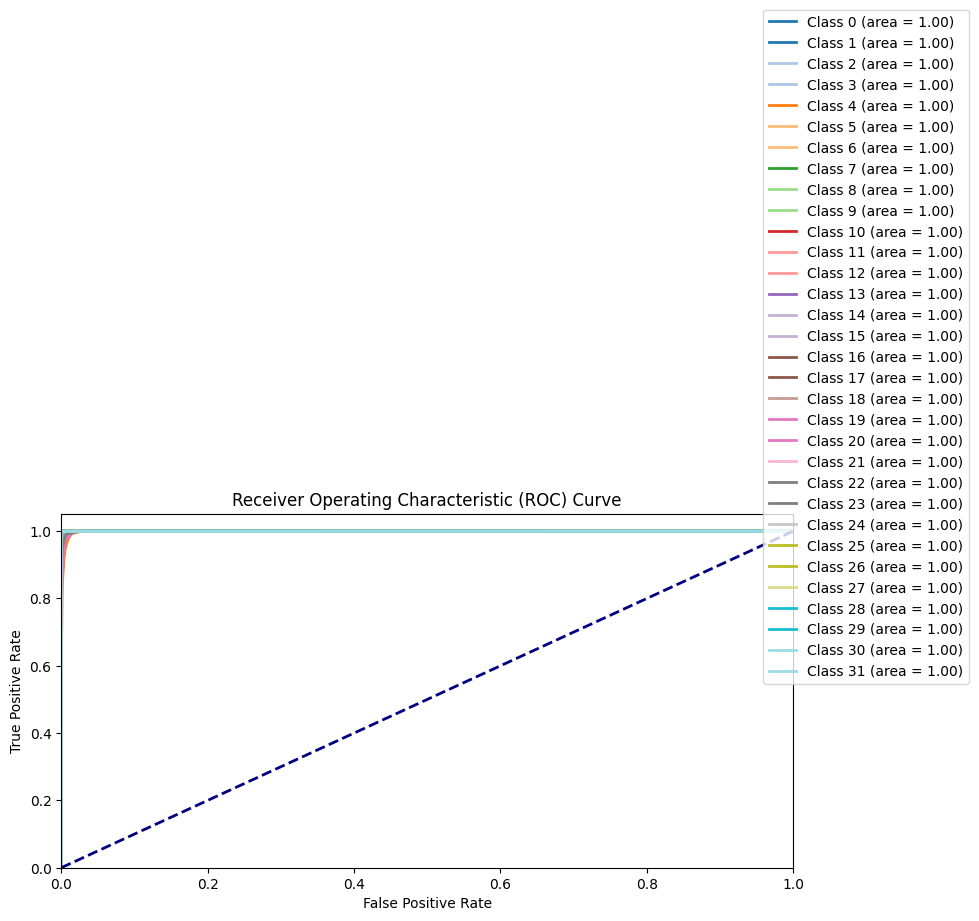

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Evaluation function for multi-class classification
def eval_metrics(model, x_test, y_test, num_classes):
    # Predict on the test dataset
    y_pred_proba = model.predict(x_test)
    y_pred = np.argmax(y_pred_proba, axis=-1)
    
    # Convert one-hot encoded y_test back to class indices
    y_test_indices = np.argmax(y_test, axis=-1)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_indices, y_pred)
    cm_list = []
    for i in range(num_classes):
        cm_list.append({
            'Class': i,
            'True Positive': cm[i, i],
            'False Positive': sum(cm[:, i]) - cm[i, i],
            'False Negative': sum(cm[i, :]) - cm[i, i],
            'True Negative': sum(sum(cm)) - (sum(cm[:, i]) + sum(cm[i, :]) - cm[i, i])
        })

    # Print Confusion Matrix as List
    print("Confusion Matrix as List:")
    for entry in cm_list:
        print(entry)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test_indices, y_pred, target_names=[str(i) for i in range(num_classes)]))

    # ROC Curve and AUC for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    plt.figure(figsize=(10, 8))
    colors = plt.cm.get_cmap('tab20', num_classes)
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], color=colors(i), lw=2, label='Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    # Plot ROC curves
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right", bbox_to_anchor=(1.25, 0.5))
    plt.tight_layout()
    plt.show()

    return

# Call the evaluation function with x_test and y_test
eval_metrics(model, x_test, y_test, num_classes=32)

In [45]:
# # Confusion Matrix Accuracy of Multi Attack Types dataset.

# def calculate_accuracy_from_confusion_matrix(cm):
#     # Sum of diagonal elements (True Positives)
#     diagonal_sum = np.trace(cm)
#     # Sum of all elements in the confusion matrix
#     total_sum = np.sum(cm)
#     # Accuracy
#     accuracy = diagonal_sum / total_sum
#     return accuracy

# # Calculate accuracy
# accuracy = calculate_accuracy_from_confusion_matrix(cm)
# print(f"Accuracy: {accuracy * 100:.2f}%")

# calculate_accuracy_from_confusion_matrix(cm)

Accuracy: 98.55%


0.9854907059616681